# FASHION MNIST DATASET NOTEBOOK
## Artificial and Convulation layers.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
print('Data loaded successfully !')

Data loaded successfully !


In [2]:
#loading train and test datasets
(X_train,Y_train),(X_test,Y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 14s 3us/step


In [65]:
def train_mnist_conv():
   
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy')>=0.95 :#sometime use “acc” instead of “accuracy”
          print("\nReached 95.0% accuracy so cancelling training!")
          self.model.stop_training = True
    
    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = (X_train,Y_train),(X_test,Y_test)
    
    #callback instance
    callback = myCallback()
    #data preprocessing only reshaping and resizing !
    training_images , test_images = training_images.reshape(60000,28,28,1) , test_images.reshape(10000,28,28,1)
    training_images,test_images=training_images/255.0 , test_images/255.0
    

    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation='relu' ,input_shape=(28,28,1)), # there are 64 filters of size 3x3
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10,activation='softmax') # There are 10 classes in our dataset.   
    ])
    
    #model compiling
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # model fitting
    history = model.fit(
        training_images,
        training_labels,
        epochs=20,
        callbacks=[callback]
       
    )
  
    return history,model



In [66]:
history,ann_model= train_mnist_conv()

Epoch 1/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.4142 - accuracy: 0.8464
Epoch 2/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2738 - accuracy: 0.8987
Epoch 3/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2284 - accuracy: 0.9147
Epoch 4/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1924 - accuracy: 0.9269
Epoch 5/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1643 - accuracy: 0.9387
Epoch 6/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1408 - accuracy: 0.9465
Epoch 7/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.1212 - accuracy: 0.9536
Reached 95.0% accuracy so cancelling training!
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1212 - accuracy: 0.9536


In [74]:
#visuals
epoches=np.arange(7)
acc = np.array(history.history['accuracy'])
loss= np.array(history.history['loss'])
import matplotlib.pyplot as plt

print(acc,loss)

[0.84640002 0.89873332 0.91469997 0.92693335 0.93868333 0.94648331
 0.95365   ] [0.41422006 0.27378914 0.22835614 0.19240659 0.16427857 0.14075932
 0.12119371]


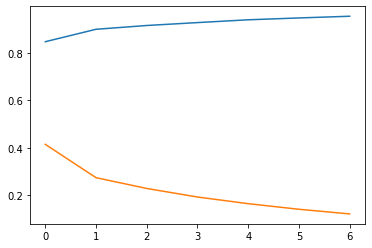

In [70]:
plt.plot(epoches,acc)
plt.plot(epoches,loss)
#since loss and accuracy seems to improve over time , you can train for more epoches ! 

In [71]:
#Evaluating on the test dataset
predict=ann_model.evaluate(X_test_preprocessed,Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2700 - accuracy: 0.9153


In [73]:
eval_loss=predict[0]
eval_acc =predict[1]
print("Evalution loss",eval_loss)
print('Evalutaion accuracy',eval_acc)

Evalution loss 0.26998698711395264
Evalutaion accuracy 0.9153000116348267


In [ ]:
#Our model is predicting good results on the images it has never seen ! Test dataset